In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load COVID-19 dataset
covid = pd.read_csv("owid-covid-data.csv")
# Load Nipah dataset
nipah = pd.read_csv("nipah_historical_outbreaks_updated.csv")

In [12]:
print(covid.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
print(nipah.columns)

Index(['Year', 'Location', 'Country', 'Cases', 'Deaths', 'CFR_Percent'], dtype='object')


In [6]:
print(covid.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [7]:
print(nipah.head())

   Year               Location     Country  Cases  Deaths  CFR_Percent
0  2001  Siliguri, West Bengal       India     66      45         68.0
1  2007     Nadia, West Bengal       India      5       5        100.0
2  2001               Meherpur  Bangladesh     13       9         69.0
3  2003                Naogaon  Bangladesh     12       8         66.0
4  2004               Faridpur  Bangladesh     35      27         77.0


In [9]:
covid_clean = covid[['location', 'date', 'total_cases', 'total_deaths', 'population']]
covid_clean

,location,date,total_cases,total_deaths,population
0,Afghanistan,2020-01-03,NaN,NaN,41128772.0
1,Afghanistan,2020-01-04,NaN,NaN,41128772.0
2,Afghanistan,2020-01-05,NaN,NaN,41128772.0
3,Afghanistan,2020-01-06,NaN,NaN,41128772.0
4,Afghanistan,2020-01-07,NaN,NaN,41128772.0
...,...,...,...,...,...
350080,Zimbabwe,2023-10-14,265808.0,5718.0,16320539.0
350081,Zimbabwe,2023-10-15,265808.0,5718.0,16320539.0
350082,Zimbabwe,2023-10-16,265808.0,5718.0,16320539.0
350083,Zimbabwe,2023-10-17,265808.0,5718.0,16320539.0


In [10]:
# Convert date column
covid_clean['date'] = pd.to_datetime(covid_clean['date'])
covid_clean

C:\Users\shrav\AppData\Local\Temp\ipykernel_2736\1142468694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_clean['date'] = pd.to_datetime(covid_clean['date'])


,location,date,total_cases,total_deaths,population
0,Afghanistan,2020-01-03,NaN,NaN,41128772.0
1,Afghanistan,2020-01-04,NaN,NaN,41128772.0
2,Afghanistan,2020-01-05,NaN,NaN,41128772.0
3,Afghanistan,2020-01-06,NaN,NaN,41128772.0
4,Afghanistan,2020-01-07,NaN,NaN,41128772.0
...,...,...,...,...,...
350080,Zimbabwe,2023-10-14,265808.0,5718.0,16320539.0
350081,Zimbabwe,2023-10-15,265808.0,5718.0,16320539.0
350082,Zimbabwe,2023-10-16,265808.0,5718.0,16320539.0
350083,Zimbabwe,2023-10-17,265808.0,5718.0,16320539.0


In [11]:
# Remove rows without case data
covid_clean = covid_clean.dropna(subset=['total_cases'])
covid_clean

,location,date,total_cases,total_deaths,population
54,Afghanistan,2020-02-26,1.0,NaN,41128772.0
55,Afghanistan,2020-02-27,1.0,NaN,41128772.0
56,Afghanistan,2020-02-28,1.0,NaN,41128772.0
57,Afghanistan,2020-02-29,1.0,NaN,41128772.0
58,Afghanistan,2020-03-01,1.0,NaN,41128772.0
...,...,...,...,...,...
350080,Zimbabwe,2023-10-14,265808.0,5718.0,16320539.0
350081,Zimbabwe,2023-10-15,265808.0,5718.0,16320539.0
350082,Zimbabwe,2023-10-16,265808.0,5718.0,16320539.0
350083,Zimbabwe,2023-10-17,265808.0,5718.0,16320539.0


In [13]:
covid_clean['year'] = covid_clean['date'].dt.year
covid_clean

C:\Users\shrav\AppData\Local\Temp\ipykernel_2736\2392381171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_clean['year'] = covid_clean['date'].dt.year


,location,date,total_cases,total_deaths,population,year
54,Afghanistan,2020-02-26,1.0,NaN,41128772.0,2020
55,Afghanistan,2020-02-27,1.0,NaN,41128772.0,2020
56,Afghanistan,2020-02-28,1.0,NaN,41128772.0,2020
57,Afghanistan,2020-02-29,1.0,NaN,41128772.0,2020
58,Afghanistan,2020-03-01,1.0,NaN,41128772.0,2020
...,...,...,...,...,...,...
350080,Zimbabwe,2023-10-14,265808.0,5718.0,16320539.0,2023
350081,Zimbabwe,2023-10-15,265808.0,5718.0,16320539.0,2023
350082,Zimbabwe,2023-10-16,265808.0,5718.0,16320539.0,2023
350083,Zimbabwe,2023-10-17,265808.0,5718.0,16320539.0,2023


In [14]:
covid_yearly = covid_clean.groupby('year').agg({
    'total_cases': 'max',
    'total_deaths': 'max'
}).reset_index()
covid_yearly

,year,total_cases,total_deaths
0,2020,82334817.0,1936739.0
1,2021,285446134.0,5474099.0
2,2022,729475620.0,6719151.0
3,2023,771407061.0,6972139.0


In [15]:
covid_yearly['fatality_rate'] = (
    covid_yearly['total_deaths'] / covid_yearly['total_cases']
) * 100
covid_yearly

,year,total_cases,total_deaths,fatality_rate
0,2020,82334817.0,1936739.0,2.352272
1,2021,285446134.0,5474099.0,1.917735
2,2022,729475620.0,6719151.0,0.921093
3,2023,771407061.0,6972139.0,0.903821


In [16]:
nipah_clean = nipah[['Year', 'Country', 'Cases', 'Deaths']]
nipah_clean

,Year,Country,Cases,Deaths
0,2001,India,66,45
1,2007,India,5,5
2,2001,Bangladesh,13,9
3,2003,Bangladesh,12,8
4,2004,Bangladesh,35,27
5,2018,India,19,17
6,2019,India,1,0
7,2021,India,1,1
8,2023,India,6,2
9,2024,India,2,2


In [17]:
nipah_clean['fatality_rate'] = (
    nipah_clean['Deaths'] / nipah_clean['Cases']
) * 100
nipah_clean

C:\Users\shrav\AppData\Local\Temp\ipykernel_2736\1639293336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nipah_clean['fatality_rate'] = (


,Year,Country,Cases,Deaths,fatality_rate
0,2001,India,66,45,68.181818
1,2007,India,5,5,100.000000
2,2001,Bangladesh,13,9,69.230769
3,2003,Bangladesh,12,8,66.666667
4,2004,Bangladesh,35,27,77.142857
5,2018,India,19,17,89.473684
6,2019,India,1,0,0.000000
7,2021,India,1,1,100.000000
8,2023,India,6,2,33.333333
9,2024,India,2,2,100.000000


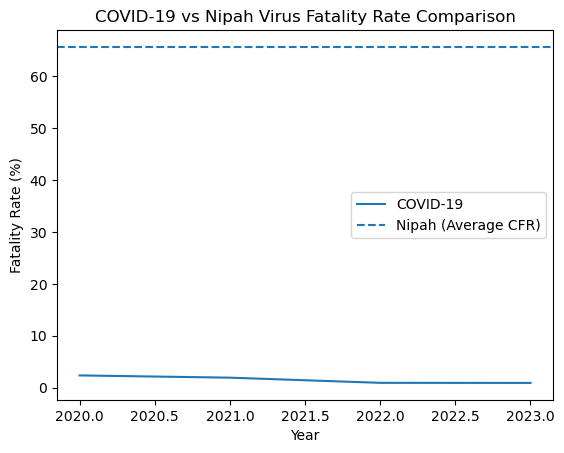

In [18]:
plt.figure()
plt.plot(covid_yearly['year'], covid_yearly['fatality_rate'], label='COVID-19')

plt.axhline(
    y=nipah_clean['fatality_rate'].mean(),
    linestyle='--',
    label='Nipah (Average CFR)'
)

plt.xlabel("Year")
plt.ylabel("Fatality Rate (%)")
plt.title("COVID-19 vs Nipah Virus Fatality Rate Comparison")
plt.legend()
plt.show()

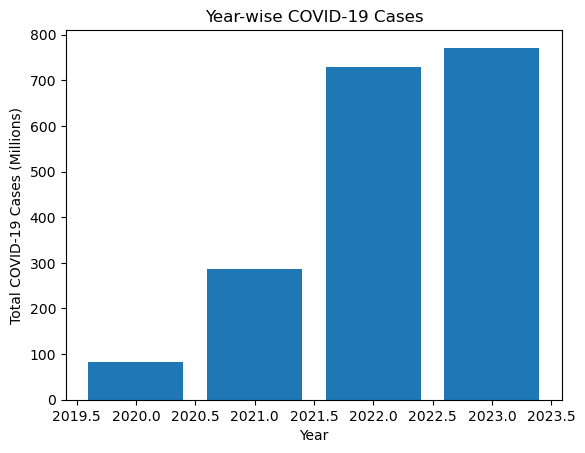

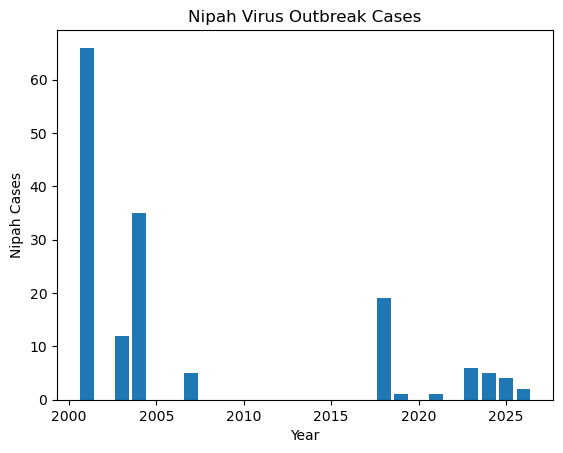

In [19]:
plt.figure()
plt.bar(covid_yearly['year'], covid_yearly['total_cases'] / 1e6)
plt.xlabel("Year")
plt.ylabel("Total COVID-19 Cases (Millions)")
plt.title("Year-wise COVID-19 Cases")
plt.show()
plt.figure()
plt.bar(nipah_clean['Year'], nipah_clean['Cases'])
plt.xlabel("Year")
plt.ylabel("Nipah Cases")
plt.title("Nipah Virus Outbreak Cases")
plt.show()

**Key Insights Based on Above:**

**1. COVID-19 shows extremely high case numbers due to global spread, but a comparatively low fatality rate.**

**2. Nipah virus has very limited outbreaks but shows a significantly higher fatality rate.**

**3. This comparison highlights that disease severity is not determined only by spread but also by lethality.**

**4. Preventive monitoring is critical for Nipah due to its high mortality despite low transmission.**

In [3]:
import pandas as pd
import mysql.connector

In [4]:
covid_df = pd.read_csv("owid-covid-data.csv")

print("COVID dataset loaded")
print(covid_df.shape)

COVID dataset loaded
(350085, 67)


In [5]:
covid_df = covid_df[
    [
        "iso_code", "continent", "location", "date",
        "total_cases", "new_cases",
        "total_deaths", "new_deaths",
        "reproduction_rate", "positive_rate",
        "stringency_index", "hospital_beds_per_thousand",
        "life_expectancy", "human_development_index",
        "population"
    ]
]

covid_df = covid_df.dropna(subset=["iso_code", "total_cases"])

In [7]:
covid_data = []

for _, row in covid_df.iterrows():
    covid_data.append((
        row["iso_code"],
        row["continent"],
        row["location"],
        row["date"],

        int(row["total_cases"]) if pd.notna(row["total_cases"]) else None,
        int(row["new_cases"]) if pd.notna(row["new_cases"]) else None,
        int(row["total_deaths"]) if pd.notna(row["total_deaths"]) else None,
        int(row["new_deaths"]) if pd.notna(row["new_deaths"]) else None,

        float(row["reproduction_rate"]) if pd.notna(row["reproduction_rate"]) else None,
        float(row["positive_rate"]) if pd.notna(row["positive_rate"]) else None,
        float(row["stringency_index"]) if pd.notna(row["stringency_index"]) else None,

        float(row["hospital_beds_per_thousand"]) if pd.notna(row["hospital_beds_per_thousand"]) else None,
        float(row["life_expectancy"]) if pd.notna(row["life_expectancy"]) else None,
        float(row["human_development_index"]) if pd.notna(row["human_development_index"]) else None,

        int(row["population"]) if pd.notna(row["population"]) else None
    ))

print("COVID data prepared:", len(covid_data))

COVID data prepared: 312088


In [9]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Shravani@2712",
    database="covid_nipah_analysis",
    auth_plugin="mysql_native_password",
    use_pure=True
)

cursor = conn.cursor()
print("Connected to MySQL")

Connected to MySQL


In [11]:
covid_sql = """
INSERT INTO covid_data
(iso_code, continent, location, date,
 total_cases, new_cases, total_deaths, new_deaths,
 reproduction_rate, positive_rate, stringency_index,
 hospital_beds_per_thousand, life_expectancy,
 human_development_index, population)
VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
"""

cursor.executemany(covid_sql, covid_data)
conn.commit()

print("COVID data inserted successfully")

COVID data inserted successfully


In [13]:
nipah_df = pd.read_csv("nipah_historical_outbreaks_updated.csv")

print("NIPAH dataset loaded")
print(nipah_df.shape)

NIPAH dataset loaded
(13, 6)


In [14]:
nipah_df = nipah_df[
    [
        "Year",
        "Location",
        "Country",
        "Cases",
        "Deaths",
        "CFR_Percent"
    ]
]

# Drop rows where key values are missing
nipah_df = nipah_df.dropna(subset=["Year", "Cases"])

In [15]:
nipah_data = []

for _, row in nipah_df.iterrows():
    nipah_data.append((
        int(row["Year"]) if pd.notna(row["Year"]) else None,
        row["Location"],
        row["Country"],

        int(row["Cases"]) if pd.notna(row["Cases"]) else None,
        int(row["Deaths"]) if pd.notna(row["Deaths"]) else None,
        float(row["CFR_Percent"]) if pd.notna(row["CFR_Percent"]) else None
    ))

print("Nipah data prepared:", len(nipah_data))


Nipah data prepared: 13


In [16]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Shravani@2712",
    database="covid_nipah_analysis",
    auth_plugin="mysql_native_password",
    use_pure=True
)

cursor = conn.cursor()
print("Connected to MySQL")

Connected to MySQL


In [17]:
nipah_sql = """
INSERT INTO nipah_data
(year, location, country,
 cases, deaths, cfr_percent)
VALUES (%s,%s,%s,%s,%s,%s)
"""

cursor.executemany(nipah_sql, nipah_data)
conn.commit()

print("Nipah data inserted successfully")

Nipah data inserted successfully
